# Script for studying the use of graphs in python:

In [1]:
import numpy as np
from random import uniform,randint
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
import networkx as nx
from time import sleep
import pandas as pd

In [2]:
from modules.distances import l1dist, l2dist, distgraph

In [15]:
## Sorting point masses into the 2D space:
xmin = -10.0
xmax = +10.0
ymin = -10.0
ymax = +10.0
npoints = 20
x = np.zeros(npoints)
y = np.zeros(npoints)
node = np.zeros(npoints)

In [43]:
for i in range(npoints):
    node[i] = int(i)
    x[i] = uniform(xmin,xmax)
    y[i] = uniform(ymin,ymax)

In [17]:
#TEST FOR MAHALANOBIS DISTANCE
M = np.array( (x,y) )
C = np.cov( M.T )
IC = np.eye(20)
invC = np.linalg.inv(C)

In [18]:
#TEST FOR MAHALANOBIS DISTANCE
mahalanobis(x,y,invC)

/home/edson/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1044: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


nan

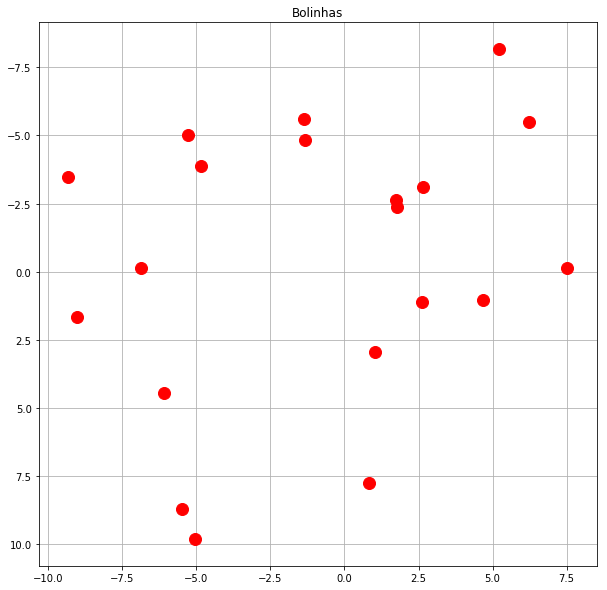

In [19]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
p1 = plt.plot(x, y, 'or' , markersize=12 )

plt.title('Bolinhas')
plt.grid()

plt.xlim( min(x)-1.0, max(x)+1.0 )
plt.ylim( min(y)-1.0, max(y)+1.0 )

plt.gca().invert_yaxis()
plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [20]:
# Lets see what's going on here:
S = nx.Graph()
for i in range(npoints):
    S.add_node(i ,pos=(x[i],y[i]))
    for j in range(npoints):
        M1 = np.array((x[i],y[j]) )
        C1 = np.cov(M1.T)
        C1 = np.zeros((1,1))
        invC1 = np.zeros((1,1))
        #S.add_edge(i,j,weight=l1dist(x,y)[i][j])  #WEIGTH IS GIVEN BY THE SUM'S NORM
        S.add_edge(i,j,weight=l2dist(x,y)[i][j])  #WEIGTH IS GIVEN BY THE EUCLIDIAN'S NORM
        #S.add_edge(i,j,weight=mahalanobis(x[i],y[j],C1 )) #WEIGTH IS GIVEN BY THE MAHALANOBIS NORM
TS = nx.minimum_spanning_tree(S)

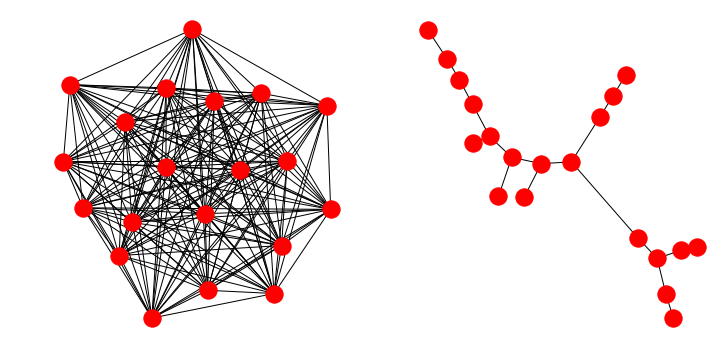

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S)
plt.subplot(122)
nx.draw(TS)
plt.show()

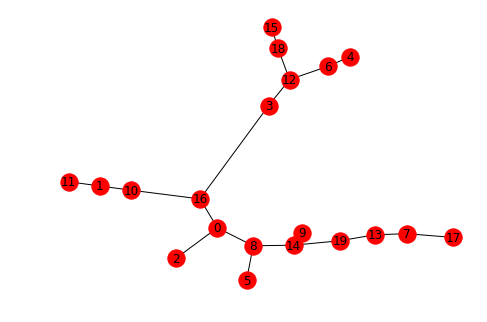

In [22]:
#TENTANDO COLOCAR LABELS NOS VERTICES
nx.draw(TS, with_labels = True)
plt.savefig('labels.png')

# TODO: Entender as saidas do MST para podermos calcular a funcao de equidistancia para calcular a funcao $\theta$

># <center> $\theta = \sum_i (d_{mst}^i - \overline{d_{mst}})^2$

In [23]:
#CALCULANDO O PHI VIA A FUNCAO CRIADA
phi, dmst = distgraph(TS)
print(phi, dmst)

35.7578998752 2.8691708688


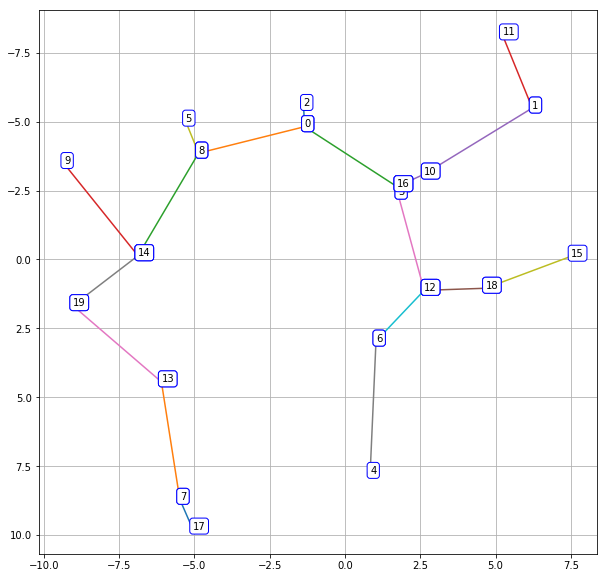

In [24]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)

for (i, j, d) in TS.edges.data('weight'):
    xt = [ x[i], x[j] ]
    yt = [ y[i], y[j] ]
    plt.annotate( int(node[i]), xy=(x[i],y[i]) , bbox=bbox_props)
    plt.annotate( int(node[j]), xy=(x[j],y[j]) , bbox=bbox_props)
    plt.plot(xt,yt,'.-')

plt.grid()
p1 = plt.plot(x, y, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

# TODO: Fazer testes simples para verificar a função distGraf:
> 1) um circulo de pontos igualmente espaçados e aleatorios; <br>
> 2) um retangulo de pontos igualmente espaçados e aleatórios; <br>
> 3) plotar a àrvore com os índices dos vértices para identificação;<br>

In [ ]:
#PLOTA UM L PARA TESTAR A FUNCAO DISTGRAPH E O NETWORKX
ax = np.linspace(-5,5,npoints)
ay = np.zeros(npoints)
ay = 5 + ay
by = np.linspace(-5,5,npoints)
bx = np.zeros(npoints)
bx = -5 + bx
ax1 = np.linspace(-5,5,npoints)
ay1 = np.zeros(npoints)
ay1 = -5 + ay1
by1 = np.linspace(-5,5,npoints)
bx1 = np.zeros(npoints)
bx1 = 5 + bx1

a = np.zeros(2*npoints)
b = np.zeros(2*npoints)

for i in range(0,npoints):
    a[i] = ax[i]
for i in range(npoints,2*npoints):
    a[i] = ay[i - npoints]
b = np.zeros(2*npoints)
for i in range(0,npoints):
    b[i] = bx[i]
for i in range(npoints+1,2*npoints):
    b[i] = by[i - npoints]
L = (a,b)
plt.plot(a,b)
plt.grid()
plt.show()

In [ ]:
S1 = nx.Graph()
for i in range(2*npoints):
    S1.add_node(i ,pos=(L[0][i],L[1][i]))
    for j in range(2*npoints):
        S1.add_edge(i,j,weight=l2dist(a,b)[i][j])
TS1 = nx.minimum_spanning_tree(S1)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(S1)
plt.subplot(122)
nx.draw(TS1)
plt.show()

In [ ]:
#Calculating the phi funtcion and the mean
phi1, dmst1 = distgraph(TS1)
print(phi1, dmst1) #this makes sense since the average is close enough to every point

In [ ]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10) )
for (i, j, d) in TS1.edges.data('weight'): 
    print(d)
    at = [ a[i], a[j] ]
    bt = [ b[i], b[j] ]
    plt.plot(at,bt,'.-')
plt.grid()
plt.savefig('L2dist.pdf')
plt.show()

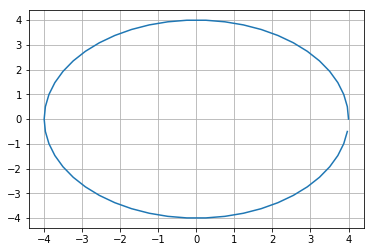

In [3]:
i = 1j
r = 4.0
theta = np.linspace(0,2*np.pi,50,endpoint=False)
circle = r*np.exp(i*theta)
node = np.arange(0,51)
plt.plot(circle.real,circle.imag)
plt.grid()
plt.show()

In [4]:
Sc = nx.Graph()
for i in range(50):
    for j in range(i,50):
        Sc.add_edge(i,j,weight=l2dist(circle.real,circle.imag)[i][j])
TSc = nx.minimum_spanning_tree(Sc)

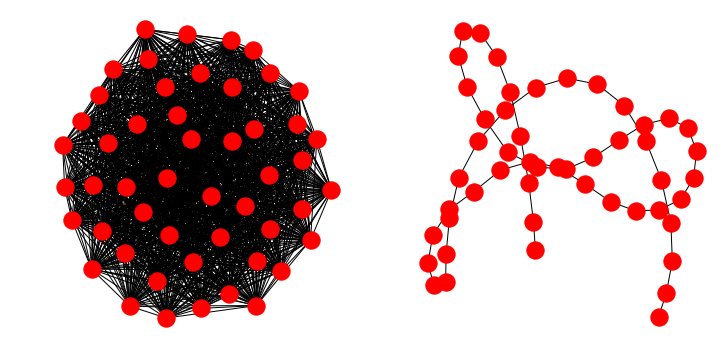

In [5]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sc)
plt.subplot(122)
nx.draw(TSc)
plt.show()

In [6]:
#Calculating the phi funtcion and the mean
phic, dmstc = distgraph(TSc)
print(f'{phic:.2f}, {dmstc:.2f}')

0.00, 0.50


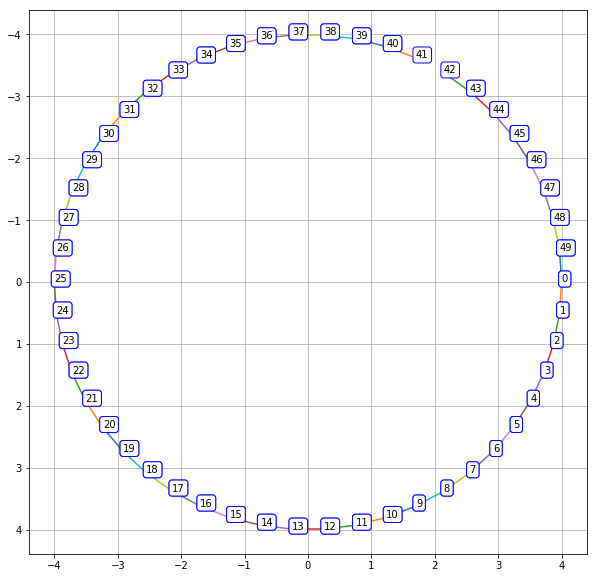

In [7]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
c = 0
for (i, j, d) in TSc.edges.data('weight'):
    xct = [ circle.real[i], circle.real[j] ]
    yct = [ circle.imag[i], circle.imag[j] ]
    plt.annotate( int(node[i]), xy=(circle.real[i],circle.imag[i]) , bbox=bbox_props)
    plt.annotate( int(node[j]), xy=(circle.real[j],circle.imag[j]) , bbox=bbox_props)
    plt.plot(xct,yct,'.-')
plt.grid()
p1 = plt.plot(circle.real, circle.imag, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()

In [7]:
## Sorting point masses into the 2D space:
npoints = 10
yl = np.zeros(npoints)
xl = np.linspace(0,10,npoints,endpoint=True)

In [8]:
node1 = np.zeros(npoints)
for i in range(npoints):
    node1[i] = int(i)

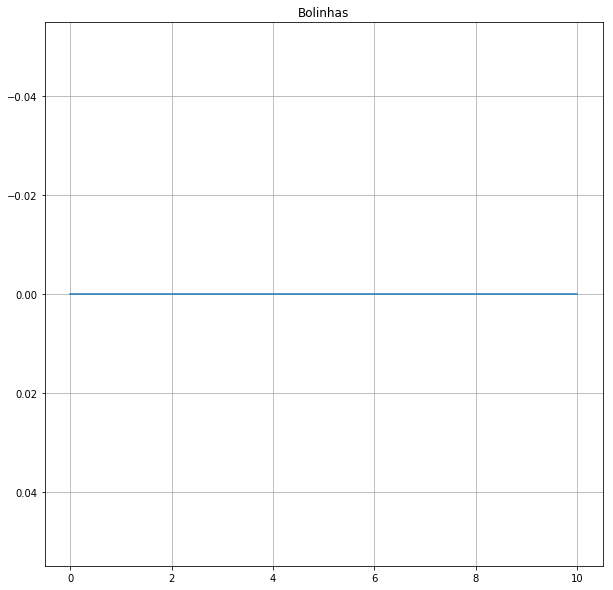

In [14]:
###--------##########################
plt.figure( figsize=(10,10), facecolor='w' )
#plt.plot(x1, y1, 'or' , markersize=12 )
#plt.plot(x2, y2, 'ob' , markersize=12 )
plt.plot(xl,yl)
plt.title('Bolinhas')
plt.grid()

#plt.xlim( min(x1)-1.0, max(x1)+1.0 )
#plt.ylim( min(y1)-1.0, max(y1)+1.0 )

plt.gca().invert_yaxis()
#plt.savefig('test_graph.png',dpi=300,transparent=True)
plt.show()

In [20]:
Sl = nx.Graph()
for i in range(npoints):
    for j in range(npoints):
        Sl.add_edge(i,j,weight=l2dist(xl,yl)[i][j])  #WEIGTH IS GIVEN BY THE EUCLIDIAN'S NORM
TSl = nx.minimum_spanning_tree(Sl)

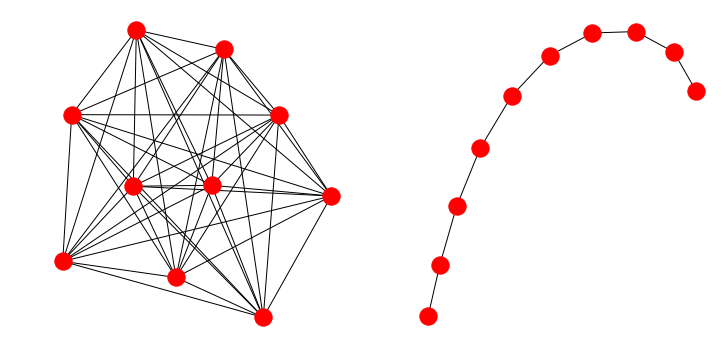

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(121)
nx.draw(Sl)
plt.subplot(122)
nx.draw(TSl)
plt.show()

In [22]:
#Calculating the phi funtcion and the mean
phic, dmstc = distgraph(TSl)
print(f'{phic:.2f}, {dmstc:.2f}')

0.00, 1.11


0 1 1.11111111111
1 2 1.11111111111
2 3 1.11111111111
3 4 1.11111111111
4 5 1.11111111111
5 6 1.11111111111
6 7 1.11111111111
7 8 1.11111111111
8 9 1.11111111111


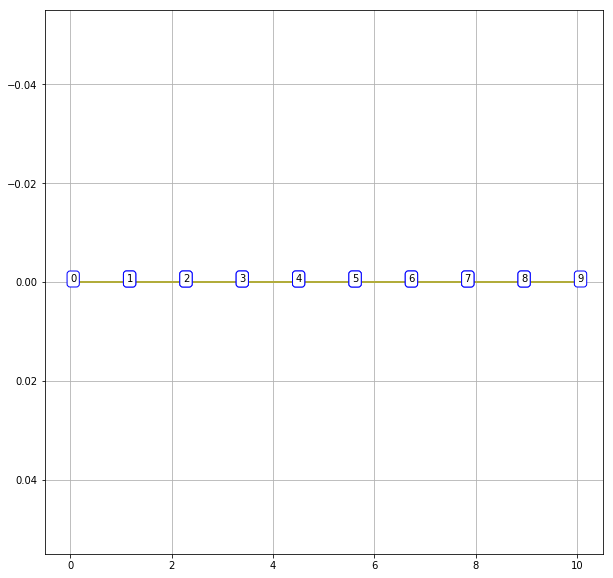

In [26]:
### Plot da Arvore Minima em coordenadas 2D:
plt.figure( figsize=(10,10), facecolor='w' )
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=1)
for (i, j, d) in TSl.edges.data('weight'):
    print(i,j,d)
    xctl = [ xl[i], xl[j] ]
    yctl = [ yl[i], yl[j] ]
    plt.annotate( int(node1[i]), xy=(xl[i],yl[i]) , bbox=bbox_props)
    plt.annotate( int(node1[j]), xy=(xl[j],yl[j]) , bbox=bbox_props)
    plt.plot(xl,yl,'.-')
plt.grid()
p1 = plt.plot(xl,yl, 'ko', marker='o' )
plt.gca().invert_yaxis()
#plt.savefig('L2dist.pdf')
plt.show()